## Начало лабораторной работы

1. Цены на кофе (12 варик)
2. Данные по инсультам (4 варик)
3. Онлайн обучение (20 варик)

Цены на кофе

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("C:/Users/TIGR228/Desktop/МИИ/Lab1/AIM-PIbd-31-Afanasev-S-S/static/csv/Starbucks.csv")

print(df.columns, "\n")

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 



Столбцы на русском

1. date: Дата
2. open: Цена открытия
3. high: Самая высокая цена дня
4. low: Самая низкая цена дня
5. Close: Цена закрытия
6. Adj Close: Скорректированная цена закрытия
7. Volume: Объем торгов

Проблемная область: Прогнозирование динамики цен акций Starbucks на основе исторических данных о ценах и объемах торгов.


In [11]:
print(df.info, "\n")

<bound method DataFrame.info of             Date       Open       High        Low      Close  Adj Close  \
0     1992-06-26   0.328125   0.347656   0.320313   0.335938   0.260703   
1     1992-06-29   0.339844   0.367188   0.332031   0.359375   0.278891   
2     1992-06-30   0.367188   0.371094   0.343750   0.347656   0.269797   
3     1992-07-01   0.351563   0.359375   0.339844   0.355469   0.275860   
4     1992-07-02   0.359375   0.359375   0.347656   0.355469   0.275860   
...          ...        ...        ...        ...        ...        ...   
8031  2024-05-17  75.269997  78.000000  74.919998  77.849998  77.849998   
8032  2024-05-20  77.680000  78.320000  76.709999  77.540001  77.540001   
8033  2024-05-21  77.559998  78.220001  77.500000  77.720001  77.720001   
8034  2024-05-22  77.699997  81.019997  77.440002  80.720001  80.720001   
8035  2024-05-23  80.099998  80.699997  79.169998  79.260002  79.260002   

         Volume  
0     224358400  
1      58732800  
2      347776

Объектом наблюдения является - цена акций Starbucks <br>
Атрибуты — содержит набор информации о ценах акций Starbucks, такие как: дата, цена открытия, максимальная цена дня, минимальная цена дня, цена закрытия, скорректированная цена закрытия и объем торгов.

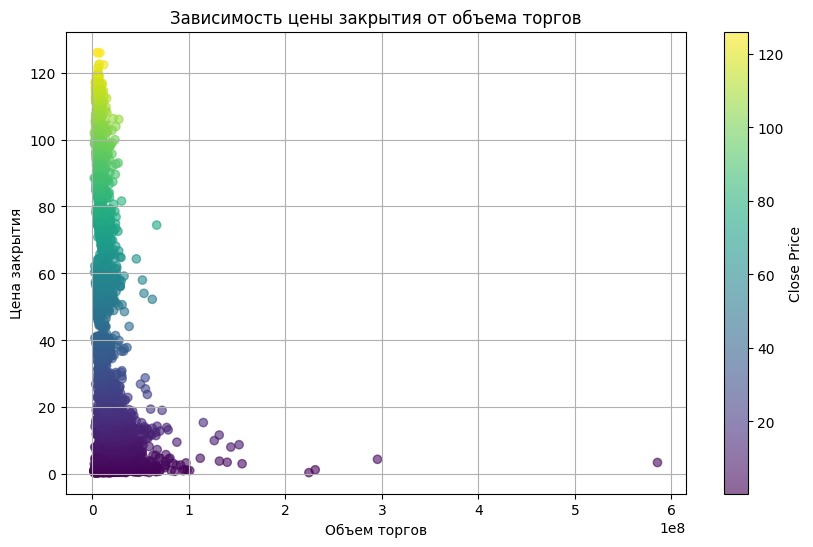

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(df['Volume'], df['Close'], c=df['Close'], alpha=0.6)
plt.colorbar(label='Close Price')

plt.title("Зависимость цены закрытия от объема торгов")
plt.ylabel("Цена закрытия")
plt.xlabel("Объем торгов")
plt.grid(visible=True)

plt.show()

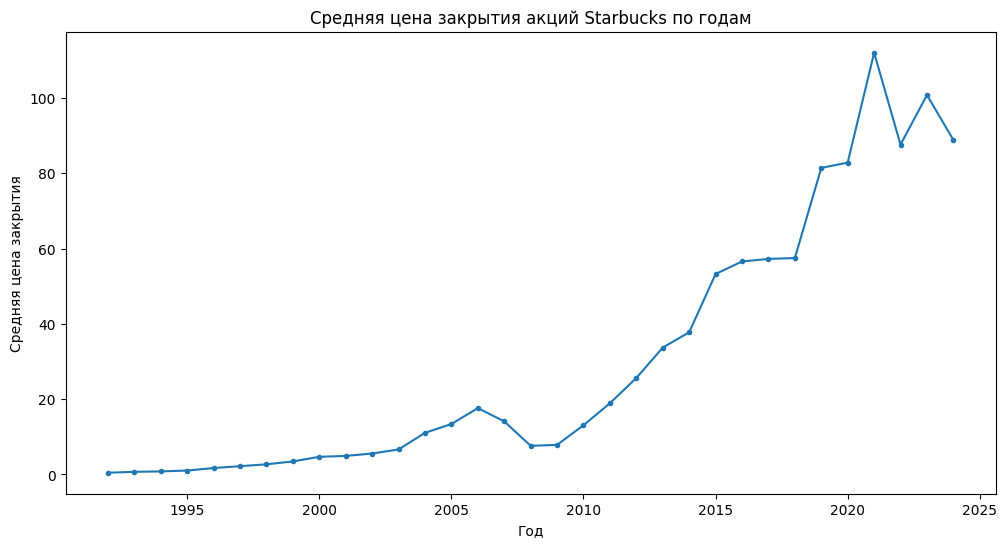

In [14]:
import matplotlib.pyplot as plt

df['Year'] = pd.to_datetime(df['Date']).dt.year

year_close = df.groupby('Year')['Close'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(year_close['Year'], year_close['Close'], marker='.')

plt.title("Средняя цена закрытия акций Starbucks по годам")
plt.xlabel("Год")
plt.ylabel("Средняя цена закрытия")

plt.show()


Связь между объектами есть. Цена связана почти со всеми характеристиками акций. Например, на графике номер один показана зависимость между ценой закрытия и объемом торгов. А на графике номер два показана зависимость средней цены закрытия от года.

<h3>Примеры бизнес-целей</h3>

1. Прогнозирование динамики цен акций Starbucks на основе исторических данных о ценах и объемах торгов.
2. Наблюдение за изменениями цен акций Starbucks с годами.

Эффект для бизнеса: Оценка и оптимизация цен, оценка и планирование затрат, выявление тенденций на рынке, стратегия планирования.


<h3>Цели технического проекта</h3>
<ul>Для первой цели:</ul>
    <li>Вход: Исторические данные о ценах и объемах торгов</li>
    <li>Целевой признак: Цена закрытия.</li>
<ul>Для второй цели:</ul>
    <li>Вход: Исторические данные о ценах и объемах торгов</li>
    <li>Целевой признак: Год</li>


<h3>Код ниже нужен для определения проблем данных</h3>

In [15]:
import pandas as pd

max_value = df.max(axis=0)

columns_with_zero = df.columns[(df == 0).any()]

numeric_data = df.select_dtypes(include='number')
shum = numeric_data.var()
low_dispers = 0.1
low_var_columns = shum[shum < low_dispers]

df['Year'] = pd.to_datetime(df['Date']).dt.year
print("Максимальные значения:\n", max_value, "\n")
print("Столбцы с нулевыми значениями:\n", columns_with_zero, "\n")
print("Признаки с низкой дисперсией:\n", low_var_columns, "\n")
print("Годы:\n", df['Year'])


Максимальные значения:
 Date         2024-05-23
Open         126.080002
High             126.32
Low          124.809998
Close        126.059998
Adj Close    118.010414
Volume        585508800
Year               2024
dtype: object 

Столбцы с нулевыми значениями:
 Index([], dtype='object') 

Признаки с низкой дисперсией:
 Series([], dtype: float64) 

Годы:
 0       1992
1       1992
2       1992
3       1992
4       1992
        ... 
8031    2024
8032    2024
8033    2024
8034    2024
8035    2024
Name: Year, Length: 8036, dtype: int32


<h4>Из полученных данных выяснилось:</h4></ul> <li>Столбцы с нулевыми значениями отсутствуют, что указывает на полноту данных и отсутствие проблем с пропущенными значениями.</li> <li>Максимальные значения для различных метрик: <ul> <li>Date: 2024-05-23</li> <li>Open: 126.080002</li> <li>High: 126.32</li> <li>Low: 124.809998</li> <li>Close: 126.059998</li> <li>Adj Close: 118.010414</li> <li>Volume: 585508800</li> <li>Year: 2024</li> </ul> </li> <li>Признаки с низкой дисперсией отсутствуют, что указывает на стабильность данных и отсутствие проблем с зашумленностью.</li> <li>Годы варьируются от 1992 до 2024. Это может быть актуальной информацией для анализа временных трендов и изменений в данных за длительный период. Однако, если данные включают будущие даты (например, 2024 год), это может указывать на проблему с актуальностью данных или просачивание данных.</li> <li>Выбросы: Максимальные значения для некоторых метрик (например, Volume) могут указывать на наличие выбросов, которые могут искажать анализ и моделирование.</li> <li>Смещение: Отсутствие столбцов с нулевыми значениями и признаков с низкой дисперсией указывает на отсутствие явных проблем со смещением данных. Однако, для более точного анализа смещения необходимо провести дополнительные исследования, такие как сравнение распределений признаков в тренировочном и тестовом наборах данных.</li> <li>Просачивание данных: Наличие будущих дат (например, 2024 год) может указывать на проблему с просачиванием данных, если эти данные используются для прогнозирования будущих событий. Это может привести к некорректным результатам моделирования.</li>

<ol><h3>Примеры решения проблем для набора данных</h3></ol>
    <li>Удаление выбросов на основе значения или Volume</li>
    <li>Удаление или обновить устаревшие даты, так как наличие будущих дат может указывать на проблему с актуальностью данных</li>



<h3>Оценка качества данных</h3>
1. Информативность. Набор данных предоставляет достаточную информацию для анализа цен на недвижимость.
2. Степень покрытия. Набор данных затрагивает только один райно, не включая информацию о других райнов.
3. Соответствие реальным данным. Данные вполне кажутся реальными, не считая некоторых редких выбросов.
4. Согласованность меток. Метки состояние и оценка вида, имеют четкие значения.

<h3>Разбиение данных на обучающую, контрольную и тестовую выборки</h3>

In [17]:
df_numeric = df.select_dtypes(include='number')

x = df_numeric.drop(['Close'], axis=1)
y = df_numeric['Close']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=14)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=14)

print(f"Исходный размер строк: {df_numeric.shape[0]} строк")
print(f"Размер обучающей выборки: {x_train.shape[0]} строк")
print(f"Размер валидационной выборки: {x_val.shape[0]} строк")
print(f"Размер тестовой выборки: {x_test.shape[0]} строк")


Исходный размер строк: 8036 строк
Размер обучающей выборки: 5625 строк
Размер валидационной выборки: 1205 строк
Размер тестовой выборки: 1206 строк


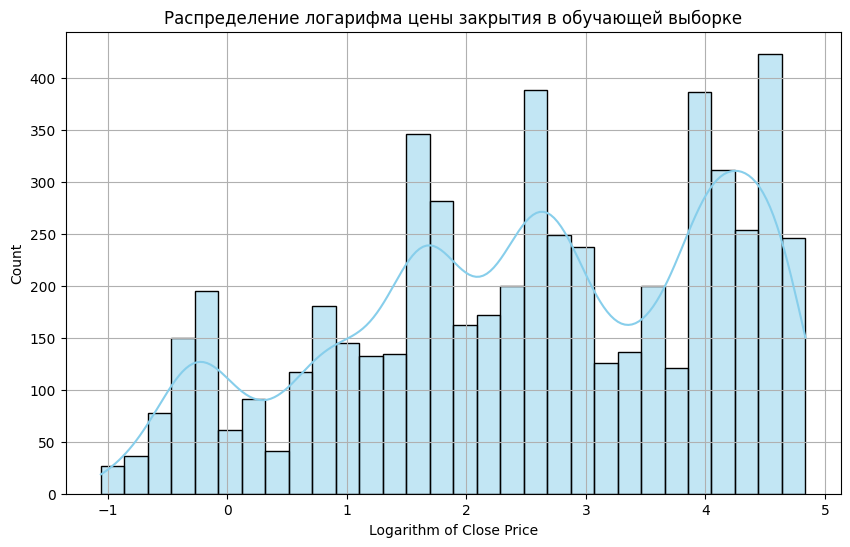

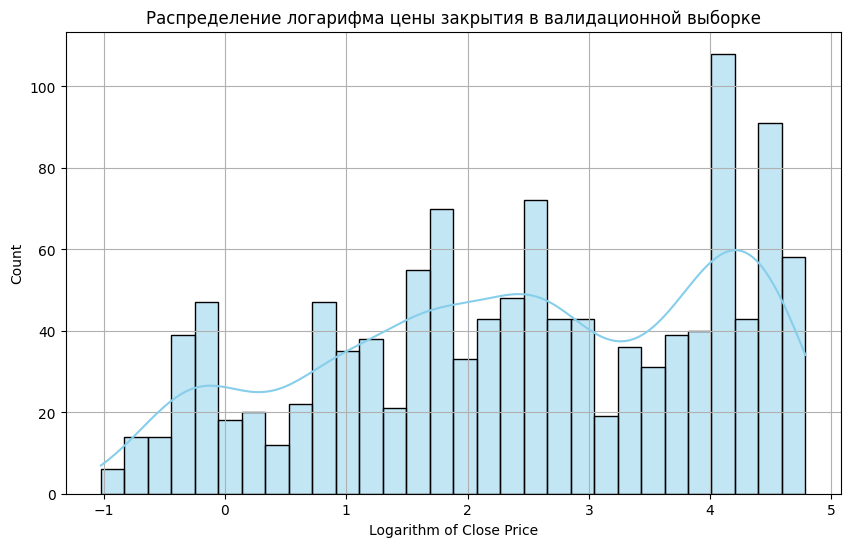

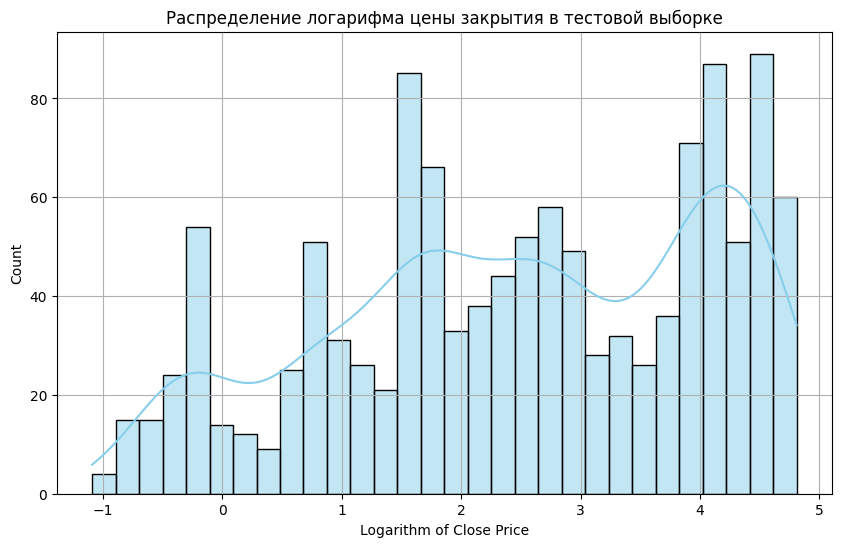

Статистические показатели для обучающей выборки:
Среднее значение: 2.53
Стандартное отклонение: 1.54
Минимальное значение: -1.06
Максимальное значение: 4.84
Количество наблюдений: 5625

Статистические показатели для валидационной выборки:
Среднее значение: 2.44
Стандартное отклонение: 1.58
Минимальное значение: -1.02
Максимальное значение: 4.79
Количество наблюдений: 1205

Статистические показатели для тестовой выборки:
Среднее значение: 2.49
Стандартное отклонение: 1.57
Минимальное значение: -1.09
Максимальное значение: 4.81
Количество наблюдений: 1206



In [19]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Логарифмирование целевой переменной
df['Close_log'] = np.log(df['Close'])

# Выбор признаков и целевой переменной
X = df.drop(['Close', 'Close_log'], axis=1)
y = df['Close_log']

# Выбор только числовых признаков
X = X.select_dtypes(include='number')

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Функция для построения гистограммы распределения целевого признака
def plot_distribution(data, title):
    """Построение гистограммы распределения целевого признака"""
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, bins=30, color='skyblue')
    plt.title(title)
    plt.xlabel('Logarithm of Close Price')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

# Построение гистограмм распределения целевого признака
plot_distribution(y_train, 'Распределение логарифма цены закрытия в обучающей выборке')
plot_distribution(y_val, 'Распределение логарифма цены закрытия в валидационной выборке')
plot_distribution(y_test, 'Распределение логарифма цены закрытия в тестовой выборке')

# Функция для вывода статистических показателей
def get_statistics(df, name):
    print(f"Статистические показатели для {name} выборки:")
    print(f"Среднее значение: {df.mean():.2f}")
    print(f"Стандартное отклонение: {df.std():.2f}")
    print(f"Минимальное значение: {df.min():.2f}")
    print(f"Максимальное значение: {df.max():.2f}")
    print(f"Количество наблюдений: {df.count()}\n")

# Вывод статистических показателей для обучающей, валидационной и тестовой выборок
get_statistics(y_train, "обучающей")
get_statistics(y_val, "валидационной")
get_statistics(y_test, "тестовой")


<h3>Oversampling и undersampling</h3>

In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Проверка наличия столбца 'Date' и создание столбца 'Year'
if 'Date' in df.columns:
    df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
    df = df.drop(['Date'], axis=1)

# Логарифмирование целевой переменной
df['Close_log'] = np.log(df['Close'])

# Создание категорий для целевой переменной
df['Close_category'] = pd.qcut(df['Close_log'], q=5, labels=[0, 1, 2, 3, 4])

# Выбор признаков и целевой переменной
X = df.drop(['Close', 'Close_log', 'Close_category'], axis=1)
y = df['Close_category']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Применение SMOTE для oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Распределение классов после SMOTE (oversampling):")
print(pd.Series(y_train_smote).value_counts())

# Применение RandomUnderSampler для undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Распределение классов после RandomUnderSampler (undersampling):")
print(pd.Series(y_train_under).value_counts())


Распределение классов после SMOTE (oversampling):
Close_category
0    1157
1    1157
2    1157
3    1157
4    1157
Name: count, dtype: int64
Распределение классов после RandomUnderSampler (undersampling):
Close_category
0    1092
1    1092
2    1092
3    1092
4    1092
Name: count, dtype: int64


<h3>Оценка сбалансированности выборок</h3>

Оценка необходимости аугментации данных

In [28]:
import numpy as np
import pandas as pd

def check_augmentation_need(data, name):
    """Проверка необходимости аугментации данных"""
    # Проверка на наличие числовых значений
    if isinstance(data.dtype, pd.CategoricalDtype):
        print(f"Данные в выборке {name} являются категориальными.")
        return
    elif not np.issubdtype(data.dtype, np.number):
        print(f"Данные в выборке {name} не являются числовыми.")
        return

    # Проверка на наличие пустых значений
    if data.isnull().any():
        print(f"Выборка {name} содержит пустые значения.")
        return

    quantiles = data.quantile([0.25, 0.5, 0.75])
    mean = data.mean()
    std = data.std()

    print(f"Проверка необходимости аугментации для {name} выборки:")
    print(f"Среднее значение: {mean:.2f}, Стандартное отклонение: {std:.2f}")
    print(f"25-й квантиль: {quantiles[0.25]:.2f}")
    print(f"50-й квантиль (медиана): {quantiles[0.5]:.2f}")
    print(f"75-й квантиль: {quantiles[0.75]:.2f}")

    if std > mean * 0.5:
        print(f"Выборка {name} несбалансирована, рекомендуется аугментация.\n")
    else:
        print(f"Выборка {name} сбалансирована, аугментация не требуется.\n")

# Пример использования функции
# y_train, y_val, y_test должны быть определены заранее
check_augmentation_need(y_train, "обучающей")
check_augmentation_need(y_val, "валидационной")
check_augmentation_need(y_test, "тестовой")


Данные в выборке обучающей являются категориальными.
Проверка необходимости аугментации для валидационной выборки:
Среднее значение: 2.44, Стандартное отклонение: 1.58
25-й квантиль: 1.20
50-й квантиль (медиана): 2.53
75-й квантиль: 4.01
Выборка валидационной несбалансирована, рекомендуется аугментация.

Данные в выборке тестовой являются категориальными.


Поскольку выборка валидационной несбалансирована и демонстрирует значительный разброс значений, что подтверждается квантилями и стандартным отклонением, применение методов аугментации рекомендуется для улучшения сбалансированности и качества модели.

Распределение 'Close_category' в обучающей выборке:
 Close_category
2    1157
4    1134
1    1126
3    1116
0    1092
Name: count, dtype: int64


C:\Users\TIGR228\AppData\Local\Temp\ipykernel_21436\2926621768.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


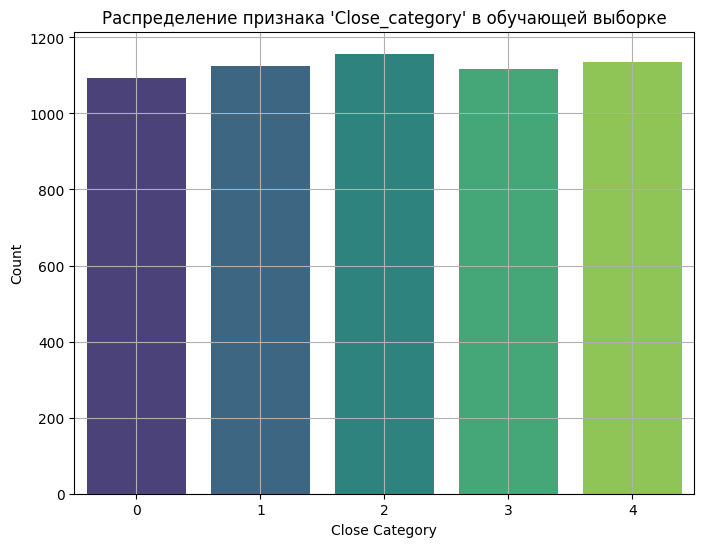

Распределение 'Close_category' в валидационной выборке:
 Close_category
0    263
1    242
3    238
4    238
2    224
Name: count, dtype: int64


C:\Users\TIGR228\AppData\Local\Temp\ipykernel_21436\2926621768.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


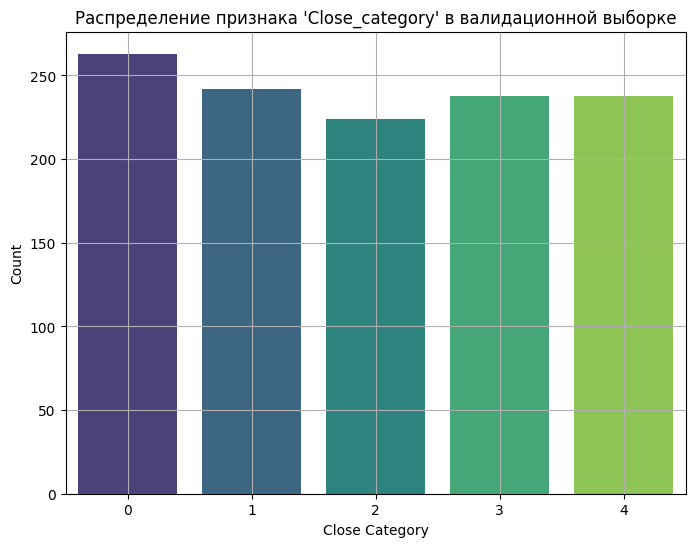

C:\Users\TIGR228\AppData\Local\Temp\ipykernel_21436\2926621768.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


Распределение 'Close_category' в тестовой выборке:
 Close_category
0    253
3    252
1    241
4    235
2    225
Name: count, dtype: int64


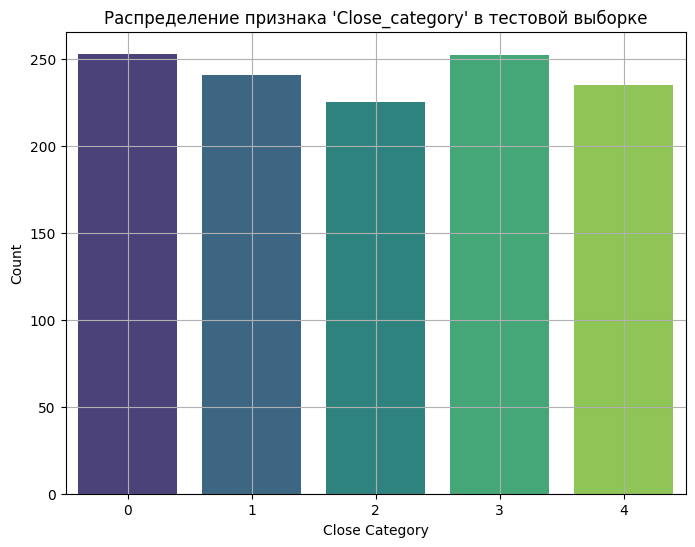

Проверка необходимости аугментации для признака 'Close_category' в обучающей выборке:
Минимальное количество наблюдений в классе: 1092
Максимальное количество наблюдений в классе: 1157
Выборка 'обучающей' сбалансирована, аугментация не требуется.

Проверка необходимости аугментации для признака 'Close_category' в валидационной выборке:
Минимальное количество наблюдений в классе: 224
Максимальное количество наблюдений в классе: 263
Выборка 'валидационной' сбалансирована, аугментация не требуется.

Проверка необходимости аугментации для признака 'Close_category' в тестовой выборке:
Минимальное количество наблюдений в классе: 225
Максимальное количество наблюдений в классе: 253
Выборка 'тестовой' сбалансирована, аугментация не требуется.

Распределение классов после SMOTE (oversampling):
Close_category
0    1157
1    1157
2    1157
3    1157
4    1157
Name: count, dtype: int64
Распределение классов после RandomUnderSampler (undersampling):
Close_category
0    1092
1    1092
2    1092
3   

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Логарифмирование целевой переменной
df['Close_log'] = np.log(df['Close'])

# Создание категорий для целевой переменной
df['Close_category'] = pd.qcut(df['Close_log'], q=5, labels=[0, 1, 2, 3, 4])

# Выбор признаков и целевой переменной
X = df.drop(['Close', 'Close_log', 'Close_category'], axis=1)
y = df['Close_category']

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

def analyze_close_category_distribution(data, name):
    """Проверка и визуализация распределения признака 'Close_category'"""
    category_counts = data.value_counts()
    print(f"Распределение 'Close_category' в {name} выборке:\n", category_counts)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title(f"Распределение признака 'Close_category' в {name} выборке")
    plt.xlabel('Close Category')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

analyze_close_category_distribution(y_train, 'обучающей')
analyze_close_category_distribution(y_val, 'валидационной')
analyze_close_category_distribution(y_test, 'тестовой')

def check_close_category_augmentation(data, name):
    print(f"Проверка необходимости аугментации для признака 'Close_category' в {name} выборке:")
    min_count = data.value_counts().min()
    max_count = data.value_counts().max()
    print(f"Минимальное количество наблюдений в классе: {min_count}")
    print(f"Максимальное количество наблюдений в классе: {max_count}")

    if max_count > min_count * 1.5:
        print(f"Выборка '{name}' несбалансирована, рекомендуется аугментация.\n")
    else:
        print(f"Выборка '{name}' сбалансирована, аугментация не требуется.\n")

check_close_category_augmentation(y_train, 'обучающей')
check_close_category_augmentation(y_val, 'валидационной')
check_close_category_augmentation(y_test, 'тестовой')

# Применение SMOTE для oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Распределение классов после SMOTE (oversampling):")
print(pd.Series(y_train_smote).value_counts())

# Применение RandomUnderSampler для undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Распределение классов после RandomUnderSampler (undersampling):")
print(pd.Series(y_train_under).value_counts())


В этом исследование данные сбалансированы, поэтому аугментация не требуется .

<h2>Данные по инсультам</h2>

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df2 = pd.read_csv("C:/Users/TIGR228/Desktop/МИИ/Lab1/AIM-PIbd-31-Afanasev-S-S/static/csv/healthcare.csv")

print(df2.head(), "\n")
print(*list(df2.columns), sep='\n')

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1   

id
gender
age
hypertension
heart_disease
ever_married


Объектом наблюдения являются пациенты и информация о их состоянии здоровья.

Атрибуты объекта:

- id (Идентификатор)
- gender (Пол)
- age (Возраст)
- hypertension (Гипертония)
- heart_disease (Сердечное заболевание)
- ever_married (Был ли когда-либо в браке)
- work_type (Тип работы)
- Residence_type (Тип проживания)
- avg_glucose_level (Средний уровень глюкозы)
- bmi (Индекс массы тела)
- smoking_status (Статус курения)
- stroke (Инсульт)

Связь между объектами:
Имеется связь между атрибутами, например между индексом массы тела (bmi) и риском инсульта (stroke), а также между средним уровнем глюкозы (avg_glucose_level) и гипертонией (hypertension).

C:\Users\TIGR228\AppData\Local\Temp\ipykernel_22948\2664058835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['bmi_category'] = pd.cut(df_clean['bmi'], bins=range(0, 100, 10))


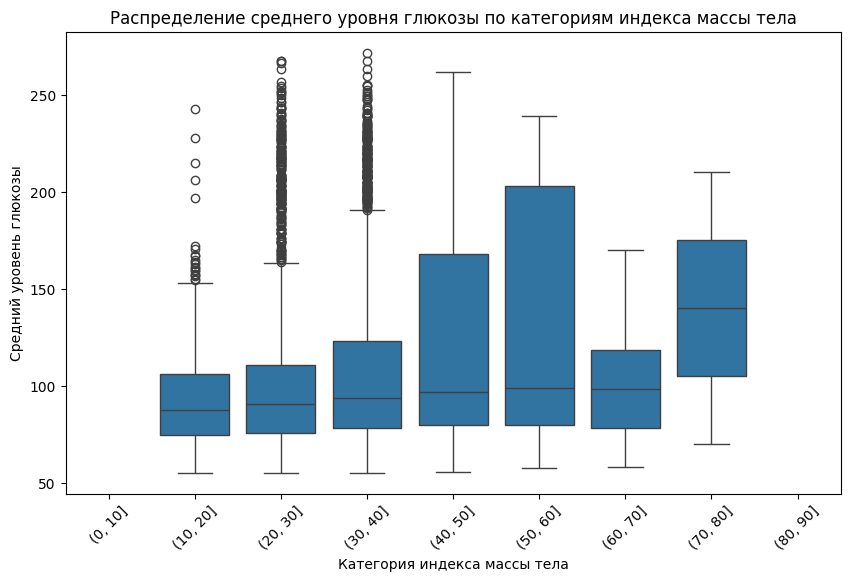

In [9]:
import seaborn as sns
df2['bmi'] = pd.to_numeric(df2['bmi'], errors='coerce')
df_clean = df2.dropna(subset=['bmi', 'avg_glucose_level'])
df_clean['bmi_category'] = pd.cut(df_clean['bmi'], bins=range(0, 100, 10))

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='bmi_category', y='avg_glucose_level')
plt.title('Распределение среднего уровня глюкозы по категориям индекса массы тела')
plt.xlabel('Категория индекса массы тела')
plt.ylabel('Средний уровень глюкозы')
plt.xticks(rotation=45)
plt.show()

В регионах с низким индексом массы тела (BMI) средний уровень глюкозы значительно варьируется, в то время как в регионах с индексом массы тела более 40 единиц наблюдается более стабильный и высокий уровень глюкозы.

<h3>Бизнес-цели</h3>

1. **Бизнес-цель**: Определение наилучших регионов для внедрения программ профилактики инсультов.<br>
    Эффект для бизнеса: Возможность выбора регионов с высоким уровнем риска инсультов для запуска маркетинговых кампаний и открытия новых медицинских центров.
- **Цели технического проекта**:
  - Построить модель для определения регионов с высоким потенциалом развития программ профилактики инсультов.
  - **Входные признаки**: Индекс массы тела (BMI), Средний уровень глюкозы, Возраст, Пол.
  - **Целевой признак**: Регион с высоким или низким потенциалом для внедрения программ профилактики инсультов.
2. **Бизнес-цель**: Оптимизация стратегий здравоохранения для снижения риска инсультов.
    Эффект для бизнеса: Компании, предоставляющие медицинские услуги, могут использовать эти данные для выбора регионов, где их услуги будут наиболее востребованы.
- **Цели технического проекта**:
  - Построить модель, определяющую регионы с наибольшим риском инсультов и прогнозировать влияние профилактических мер на здоровье населения.
  - **Входные признаки**: Гипертония, Сердечное заболевание, Курение, Индекс массы тела (BMI).
  - **Целевой признак**: Уровень риска инсультов.
3. **Бизнес-цель**: Определение экономического потенциала регионов на основе демографических данных и уровня здоровья населения.
    Эффект для бизнеса: Компании могут определить регионы с высоким уровнем здоровья населения для открытия новых офисов, производств или филиалов.
- **Цели технического проекта**:
  - Создать модель для ранжирования регионов по их экономическому потенциалу на основе демографических данных и уровня здоровья населения.
  - **Входные признаки**: Индекс массы тела (BMI), Средний уровень глюкозы, Возраст, Пол, Гипертония, Сердечное заболевание.
  - **Целевой признак**: Оценка экономического потенциала.

**<h3>Поиск проблем</h3>**

Количество пропущенных ячеек: 
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


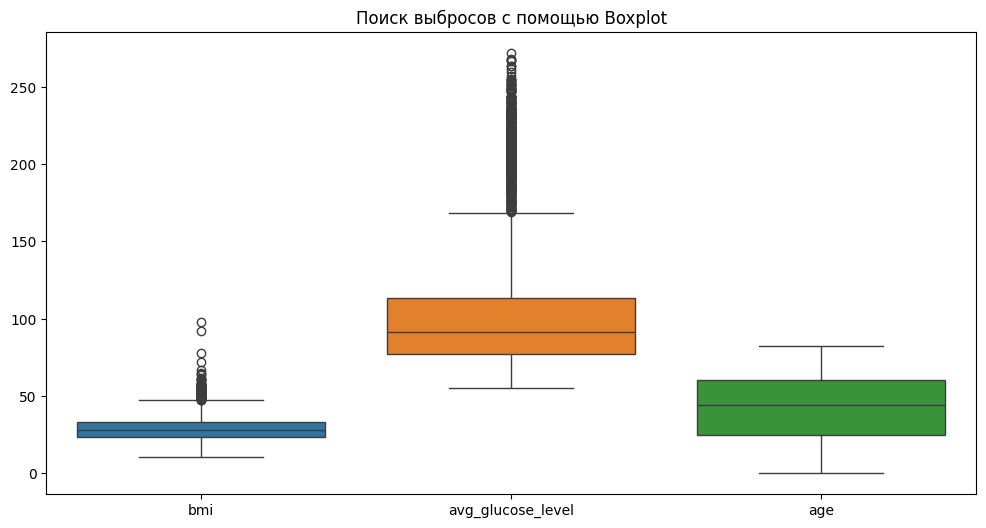

Количество выбросов (по Z-оценке): 118


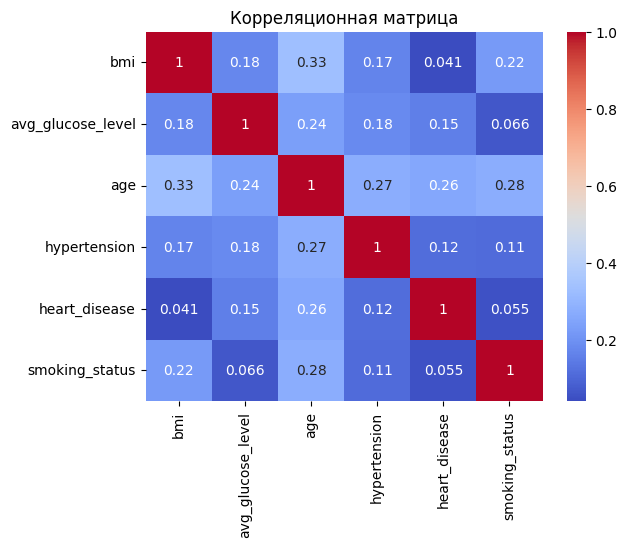

In [11]:
from scipy import stats

missing_val = df2.isnull().sum()
print("Количество пропущенных ячеек: \n", missing_val)

df2['bmi'] = pd.to_numeric(df2['bmi'], errors='coerce')
df2['avg_glucose_level'] = pd.to_numeric(df2['avg_glucose_level'], errors='coerce')
df2['age'] = pd.to_numeric(df2['age'], errors='coerce')
df2['hypertension'] = df2['hypertension'].astype(int)
df2['heart_disease'] = df2['heart_disease'].astype(int)
df2['smoking_status'] = df2['smoking_status'].astype('category').cat.codes

# Удаление пропусков для корректного анализа
data = df2.dropna()

# 1. Визуализация распределения данных (помогает выявить выбросы)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['bmi', 'avg_glucose_level', 'age']])
plt.title('Поиск выбросов с помощью Boxplot')
plt.show()

# Вычисление Z-оценки для выявления выбросов
z_score = np.abs(stats.zscore(data[['bmi', 'avg_glucose_level', 'age']]))
outliers = np.where(z_score > 3)
print(f"Количество выбросов (по Z-оценке): {len(outliers[0])}")

# Построение корреляционной матрицы для поиска зашумленности
corr_matrix = data[['bmi', 'avg_glucose_level', 'age', 'hypertension', 'heart_disease', 'smoking_status']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Из матрицы корреляции можно сделать выводы относительно зависимости между атрибутами и выявить наиболее бесполезные из них. Признаки с низкими корреляциями, такие как сердечные заболевания (heart_disease), уровень глюкозы (avg_glucose_level), и статус курения (smoking_status), могут содержать шум или не являться значимыми для текущей задачи медицинского анализа. Это не обязательно означает, что эти переменные всегда шумны, но в контексте данного анализа они могут оказаться несущественными.

Проведем анализа остаточных ошибок, чтобы убедиться в том, что выше упомянутые атрибуты действиельно бесполезны в данном контексе.

По итогу вышло больше количество шумов

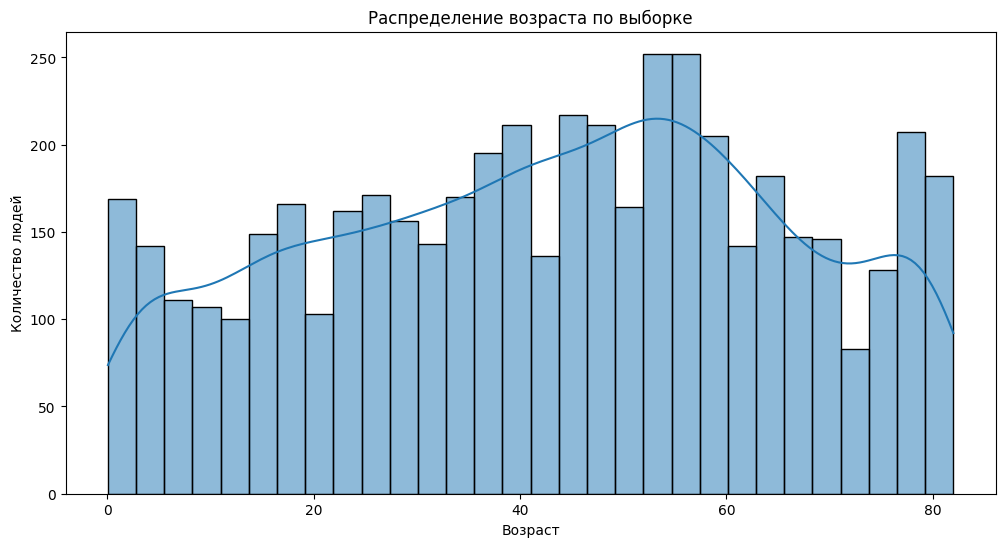

Среднее значение возраста: 42.865373803218574
Медиана возраста: 44.0


In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data['age'], kde=True, bins=30)
plt.title('Распределение возраста по выборке')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.show()

mean_age = data['age'].mean()
median_age = data['age'].median()
print(f"Среднее значение возраста: {mean_age}")
print(f"Медиана возраста: {median_age}")


Определяем смещение. Если разница между средним и медианным значениями существенна, это может указывать на смещение. В данном случаем смещение нет.

In [15]:
# Приведение столбцов к числовым значениям
data['avg_glucose_level'] = pd.to_numeric(data['avg_glucose_level'].astype(str).str.replace(',', ''), errors='coerce')
data['bmi'] = pd.to_numeric(data['bmi'].astype(str).str.replace(',', ''), errors='coerce')

# Проверка на аномалии в данных
invalid_avg_glucose = data[data['avg_glucose_level'] < 0]  # Проверка на отрицательные значения
invalid_bmi = data[data['bmi'] < 0]  # Проверка на отрицательные значения

if not invalid_avg_glucose.empty:
    print("Просачивание данных: Неверные значения среднего уровня глюкозы в следующих строках:")
    print(invalid_avg_glucose)
else:
    print("Просачивания данных в столбце 'avg_glucose_level' не обнаружено.")

if not invalid_bmi.empty:
    print("Просачивание данных: Неверные значения индекса массы тела в следующих строках:")
    print(invalid_bmi)
else:
    print("Просачивания данных в столбце 'bmi' не обнаружено.")

Просачивания данных в столбце 'avg_glucose_level' не обнаружено.
Просачивания данных в столбце 'bmi' не обнаружено.


C:\Users\TIGR228\AppData\Local\Temp\ipykernel_22948\3655327482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_glucose_level'] = pd.to_numeric(data['avg_glucose_level'].astype(str).str.replace(',', ''), errors='coerce')
C:\Users\TIGR228\AppData\Local\Temp\ipykernel_22948\3655327482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bmi'] = pd.to_numeric(data['bmi'].astype(str).str.replace(',', ''), errors='coerce')


Также я хочу выявить наличие "просачивания данных" путем проверки аномалий. Для этого хочу сравнить уровень глюкозы и индекс массы тела с неверными значениями. Логично если они окажутся отрицательнами, это будет свидетельствовать о нарушении логики данных. В данном случае, после проверки, данные не показали никаких аномалий, и "просачивания данных" не обнаружено.

In [20]:
data_no_outliers = data[(z_score < 3).all(axis=1)]
print(f"Размер данных после удаления выбросов: {data_no_outliers.shape}")

# Столбцы для проверки и замены выбросов
columns_to_check = ['avg_glucose_level', 'bmi', 'age', 'heart_disease', 'hypertension']

for column in columns_to_check:
    col_z_score = np.abs(stats.zscore(data[column]))
    
    median_value = data[column].median()
    
    print(f"Обрабатываем столбец: {column}, медианное значение: {median_value}")
    
    # Замена выбросов медианными значениями
    data[column] = np.where(col_z_score > 3, median_value, data[column])

print("Выбросы заменены медианными значениями.")

Размер данных после удаления выбросов: (4792, 12)
Обрабатываем столбец: avg_glucose_level, медианное значение: 91.68
Обрабатываем столбец: bmi, медианное значение: 28.1
Обрабатываем столбец: age, медианное значение: 44.0
Обрабатываем столбец: heart_disease, медианное значение: 0.0
Обрабатываем столбец: hypertension, медианное значение: 0.0
Выбросы заменены медианными значениями.


C:\Users\TIGR228\AppData\Local\Temp\ipykernel_22948\1082538639.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(col_z_score > 3, median_value, data[column])
C:\Users\TIGR228\AppData\Local\Temp\ipykernel_22948\1082538639.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(col_z_score > 3, median_value, data[column])
C:\Users\TIGR228\AppData\Local\Temp\ipykernel_22948\1082538639.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Решили проблему с выбрасами 

<h3>Оценка качества набора данных:</h3>

**Информативность:** Набор данных содержит информацию о пациентах с инсультами, включая демографические и медицинские показатели, такие как пол, возраст, наличие гипертонии, сердечных заболеваний, индекс массы тела (BMI), уровень глюкозы в крови и статус курения. Эти колонки обеспечивают важные метрики для анализа факторов риска инсульта.

**Степень покрытия:** В наборе данных представлено множество пациентов, что обеспечивает достаточно широкий охват для анализа влияния различных факторов на риск инсульта. Этот объем данных позволяет проводить статистические и предсказательные анализы.

**Соответствие реальным данным:** Данные являются актуальными и могут быть основаны на реальных медицинских обследованиях и исследованиях, что делает их значимыми для клинической практики и научных исследований.

**Согласованность меток:** Имена колонок в наборе данных четкие и интуитивно понятные, такие как "age" (возраст), "avg_glucose_level" (средний уровень глюкозы) и "stroke" (инсульт). Однако необходимо обратить внимание на формат данных, поскольку некоторые числовые значения могут быть представлены как строки, что требует предобработки для корректного анализа.

<h3>Устранение проблемы пропущенных данных</h3>

In [21]:

data_filled_mean = data.copy()
data_filled_mean["avg_glucose_level"] = pd.to_numeric(data_filled_mean["avg_glucose_level"], errors='coerce')

mean_value = data_filled_mean["avg_glucose_level"].mean()
data_filled_mean["avg_glucose_level"] = data_filled_mean["avg_glucose_level"].fillna(mean_value)

print(f"Данные после заполнения средним значением: {data_filled_mean['avg_glucose_level'].isnull().sum()} пропущенных значений осталось.")


Данные после заполнения средним значением: 0 пропущенных значений осталось.


In [22]:
columns_to_drop = ["id", "stroke"]
columns_to_drop = [col for col in columns_to_drop if col in data_filled_mean.columns]

X = data_filled_mean.drop(columns=columns_to_drop)
y = data_filled_mean["stroke"] 

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Обучающая выборка: {X_train.shape[0]} строк")
print(f"Валидационная выборка: {X_val.shape[0]} строк")
print(f"Тестовая выборка: {X_test.shape[0]} строк")

Обучающая выборка: 2945 строк
Валидационная выборка: 982 строк
Тестовая выборка: 982 строк


In [31]:
# Проверка распределения целевой переменной (инсульт) в обучающей, валидационной и тестовой выборках
print("Распределение в обучающей выборке (инсульт):\n", y_train.describe())
print("\nРаспределение в валидационной выборке (инсульт):\n", y_val.describe())
print("\nРаспределение в тестовой выборке (инсульт):\n", y_test.describe())


Распределение в обучающей выборке (инсульт):
 count    2945.000000
mean        0.039389
std         0.194551
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

Распределение в валидационной выборке (инсульт):
 count    982.000000
mean       0.046843
std        0.211411
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: stroke, dtype: float64

Распределение в тестовой выборке (инсульт):
 count    982.000000
mean       0.047862
std        0.213582
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: stroke, dtype: float64


Дисбаланс данных:

- В обучающей выборке среднее значение инсульта составляет около 3.9%, однако максимальное значение достигает 1, что указывает на наличие случаев инсульта у отдельных пациентов.

- Стандартное отклонение в обучающей выборке составляет 0.195, что свидетельствует о наличии значительного числа пациентов, не перенесших инсульт (поскольку 0 составляет 75% выборки), наряду с небольшим числом случаев инсульта (около 4%).

- В валидационной выборке среднее значение инсульта немного выше, около 4.7%, и также имеет стандартное отклонение 0.211. В тестовой выборке среднее значение инсульта составляет 4.8% с аналогичным разбросом. 

<h3>Методы приращения данных<h3>

In [32]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Oversampling (увеличение выборки) для обучающих данных
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
print(f"Размер обучающей выборки после Oversampling: {X_train_res.shape[0]} строк")
print(f"Распределение целевой переменной после Oversampling:\n{y_train_res.value_counts(normalize=True)}")

# Undersampling (уменьшение выборки) для обучающих данных
rus = RandomUnderSampler(random_state=42)
X_train_res_under, y_train_res_under = rus.fit_resample(X_train, y_train)
print(f"Размер обучающей выборки после Undersampling: {X_train_res_under.shape[0]} строк")
print(f"Распределение целевой переменной после Undersampling:\n{y_train_res_under.value_counts(normalize=True)}")


Размер обучающей выборки после Oversampling: 5658 строк
Распределение целевой переменной после Oversampling:
stroke
0    0.5
1    0.5
Name: proportion, dtype: float64
Размер обучающей выборки после Undersampling: 232 строк
Распределение целевой переменной после Undersampling:
stroke
0    0.5
1    0.5
Name: proportion, dtype: float64


<h2>Онлайн обучение<h2>

In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df3 = pd.read_csv("C:/Users/TIGR228/Desktop/МИИ/Lab1/AIM-PIbd-31-Afanasev-S-S/static/csv/students_adaptability_level_online_education.csv")

print(df3.columns, "\n")

Index(['Education Level', 'Institution Type', 'Gender', 'Age', 'Device',
       'IT Student', 'Location', 'Financial Condition', 'Internet Type',
       'Network Type', 'Flexibility Level'],
      dtype='object') 



Основные столбцы:</br>
**Education Level** — Уровень образования</br>
**Institution Type** — Тип учебного заведения</br>
**Gender** — Пол</br>
**Age** — Возраст</br>
**Device** — Устройство</br>
**IT Student** — Студент IT</br>
**Location** — Местоположение</br>
**Financial Condition** — Финансовое состояние</br>
**Internet Type** — Тип интернета</br>
**Network Type** — Тип сети</br>
**Flexibility Level** — Уровень гибкости</br>

<h2>Проблемная область<h2>

Данный набор данных относится к анализу онлайн образования, его распределению по возрастам, странам и типам учебных заведений. Проблемная область связана с доступностью онлайн-обучения и с изучением факторов, влияющих на качество образовательного опыта, выявлением тенденций в использовании различных устройств, а также влиянием финансовых условий, интернет-соединения и гибкости учебных программ на эффективность и доступность онлайн обучения.

<h3> Анализ содержимого<h3>

**Объекты наблюдения:** Студенты, участвующие в онлайн обучении</br>
**Атрибуты объектов:** Уровень образования, тип учебного заведения, пол, возраст, устройство, является ли студент IT-специальности, местоположение, финансовое состояние, тип интернета, тип сети, уровень гибкости обучения</br>
**Связи между объектами:** Можно выявить связи между возрастом и использованием устройства для обучения, местоположением и типом интернет-соединения, а также финансовым состоянием и гибкостью образовательной программы.

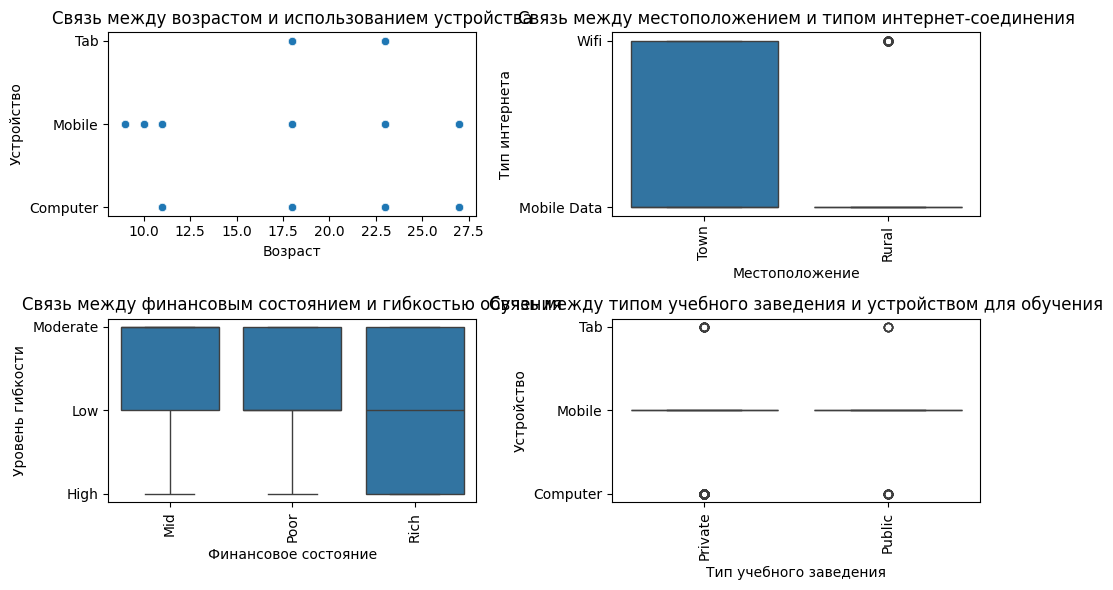

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Связь между возрастом и использованием устройства для обучения
plt.subplot(2, 2, 1)
sns.scatterplot(data=df3, x='Age', y='Device')
plt.title('Связь между возрастом и использованием устройства')
plt.xlabel('Возраст')
plt.ylabel('Устройство')

# Связь между местоположением и типом интернет-соединения
plt.subplot(2, 2, 2)
top_locations = df3['Location'].value_counts().index[:10]
sns.boxplot(data=df3[df3['Location'].isin(top_locations)], x='Location', y='Internet Type')
plt.title('Связь между местоположением и типом интернет-соединения')
plt.xticks(rotation=90)
plt.xlabel('Местоположение')
plt.ylabel('Тип интернета')

# Связь между финансовым состоянием и гибкостью обучения
plt.subplot(2, 2, 3)
sns.boxplot(data=df3, x='Financial Condition', y='Flexibility Level')
plt.title('Связь между финансовым состоянием и гибкостью обучения')
plt.xticks(rotation=90)
plt.xlabel('Финансовое состояние')
plt.ylabel('Уровень гибкости')

# Связь между типом учебного заведения и использованием устройства
plt.subplot(2, 2, 4)
top_institutions = df3['Institution Type'].value_counts().index[:10]
sns.boxplot(data=df3[df3['Institution Type'].isin(top_institutions)], x='Institution Type', y='Device')
plt.title('Связь между типом учебного заведения и устройством для обучения')
plt.xticks(rotation=90)
plt.xlabel('Тип учебного заведения')
plt.ylabel('Устройство')

plt.tight_layout()
plt.show()


<h3>Примеры бизнес-целей<h3>

1. Образовательные платформы могут использовать эти данные для анализа, какие устройства и типы интернет-соединений студенты используют чаще всего, чтобы оптимизировать свои курсы под предпочтительные форматы обучения.
2. Учебные заведения могут использовать эти данные для анализа возрастных моделей использования онлайн-обучения, что поможет лучше планировать программы и курсы для различных возрастных групп.
3. Компании в сфере EdTech могут использовать данные для выявления стран и регионов, где онлайн-обучение наиболее востребовано, и нацелить свои маркетинговые и инвестиционные усилия на эти рынки.

<h3>Цели технического проекта<h3>

1. Вход: Данные об устройствах и типе интернет-соединения.<br>
Целевой признак: Устройство, тип интернета.

2. Вход: Данные о возрасте и устройстве, используемом для онлайн-обучения.<br>
Целевой признак: Возраст, устройство.

3. Вход: Данные о местоположении и типе интернет-соединения.<br>
Целевой признак: Местоположение, тип интернета.

<h3>Выявление и решение проблем<h3>

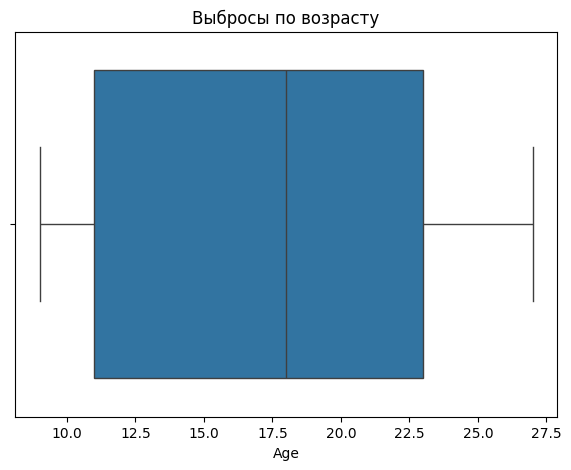

Размер данных до удаления выбросов:  (1205, 11)
Размер данных после удаления выбросов:  (1205, 11)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df3 = pd.read_csv("C:/Users/TIGR228/Desktop/МИИ/Lab1/AIM-PIbd-31-Afanasev-S-S/static/csv/students_adaptability_level_online_education.csv")
fig, axs = plt.subplots(1, 1, figsize=(7, 5))

sns.boxplot(data=df3, x='Age', ax=axs)
axs.set_title("Выбросы по возрасту")

plt.show()

print("Размер данных до удаления выбросов: ", df3.shape)

# Функция для удаления выбросов с помощью IQR только для числовых данных
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

# Удаление выбросов по возрасту
df3_cleaned = remove_outliers(df3, 'Age')

print("Размер данных после удаления выбросов: ", df3_cleaned.shape)

C:\Users\TIGR228\AppData\Local\Temp\ipykernel_15252\1872101371.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_dist.values, y=location_dist.index, palette='coolwarm')


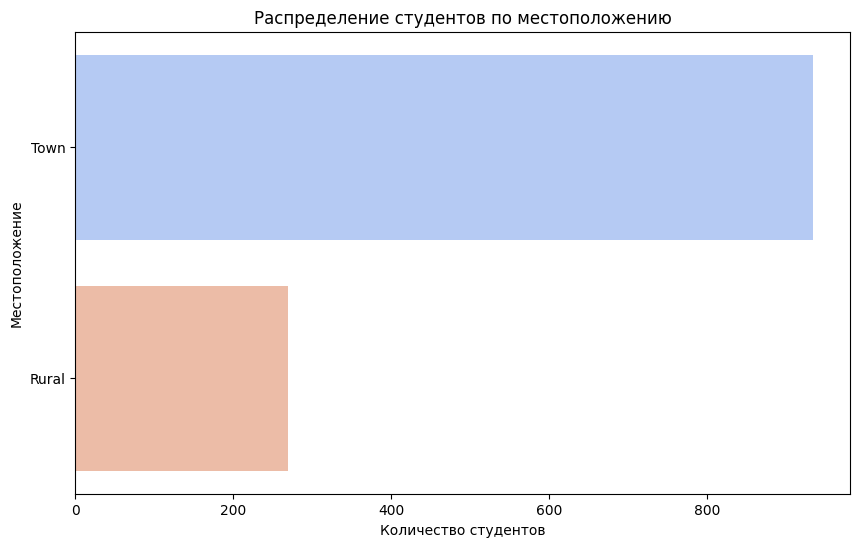

C:\Users\TIGR228\AppData\Local\Temp\ipykernel_15252\1872101371.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=institution_dist.values, y=institution_dist.index, palette='coolwarm')


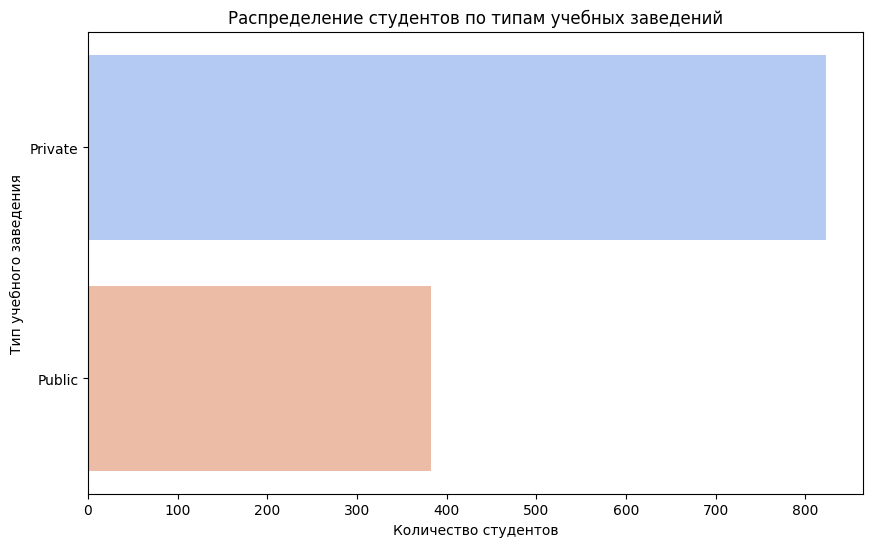

(Location
 Town     77.593361
 Rural    22.406639
 Name: proportion, dtype: float64,
 Institution Type
 Private    68.298755
 Public     31.701245
 Name: proportion, dtype: float64)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация распределения студентов по местоположению
plt.figure(figsize=(10, 6))
location_dist = df3['Location'].value_counts()
sns.barplot(x=location_dist.values, y=location_dist.index, palette='coolwarm')
plt.title('Распределение студентов по местоположению')
plt.xlabel('Количество студентов')
plt.ylabel('Местоположение')
plt.show()

# Визуализация распределения студентов по типу учебных заведений
plt.figure(figsize=(10, 6))
institution_dist = df3['Institution Type'].value_counts()
sns.barplot(x=institution_dist.values, y=institution_dist.index, palette='coolwarm')
plt.title('Распределение студентов по типам учебных заведений')
plt.xlabel('Количество студентов')
plt.ylabel('Тип учебного заведения')
plt.show()

# Процентное распределение по местоположению и типам учебных заведений (для наглядности)
location_percentage = df3['Location'].value_counts(normalize=True) * 100
institution_percentage = df3['Institution Type'].value_counts(normalize=True) * 100

location_percentage.head(10), institution_percentage.head(10)


Имеется смещение по местоположению или типам учебных заведений. Но думаю это особенность данного датасета, а не самих данных.

In [15]:
# 1. Проверим уникальность по ключевым столбцам
unique_devices = df3['Device'].nunique()
unique_locations = df3['Location'].nunique()
unique_institution_types = df3['Institution Type'].nunique()

# 2. Проверка дубликатов
duplicates_count = df3.duplicated().sum() 

unique_devices, unique_locations, unique_institution_types, duplicates_count


(3, 2, 2, np.int64(980))

Таким образом, можно сказать, что наш набор данных демонстрирует высокую информативность, что позволяет проводить различные виды анализов.

C:\Users\TIGR228\AppData\Local\Temp\ipykernel_15252\2241712000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, y='Institution Type', order=df3['Institution Type'].value_counts().index, palette='coolwarm')


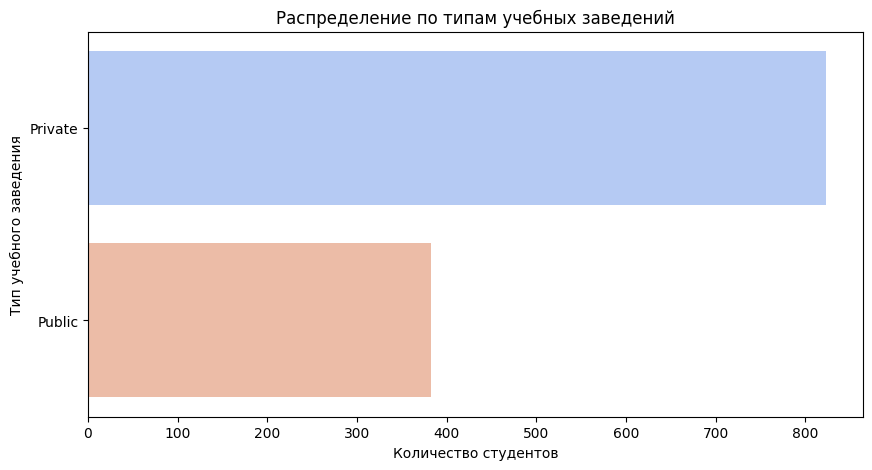

In [16]:
# Проверка на согласованность категорий
unique_devices = df3['Device'].unique()  # Уникальные устройства
unique_institution_types = df3['Institution Type'].unique()  # Уникальные типы учебных заведений

# Пример для визуального анализа распределения по типам учебных заведений
plt.figure(figsize=(10, 5))
sns.countplot(data=df3, y='Institution Type', order=df3['Institution Type'].value_counts().index, palette='coolwarm')
plt.title('Распределение по типам учебных заведений')
plt.xlabel('Количество студентов')
plt.ylabel('Тип учебного заведения')
plt.show()


Для оценки покрытия мы смотрим на то, насколько отличаются данные по типу учебного заведения и количеству студентов.

Устранение проблемы пропущенных данных

In [17]:
missing_values = df3.isnull().sum()
df_dropna = df3.dropna()
df_fillna_const = df3.fillna(0)
df_fillna_mean = df3.copy()
for column in df_fillna_mean.select_dtypes(include=['float64', 'int64']):
    df_fillna_mean[column].fillna(df_fillna_mean[column].mean(), inplace=True)
missing_values, df_dropna.shape, df_fillna_const.shape, df_fillna_mean.shape


C:\Users\TIGR228\AppData\Local\Temp\ipykernel_15252\2536815725.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna_mean[column].fillna(df_fillna_mean[column].mean(), inplace=True)


(Education Level        0
 Institution Type       0
 Gender                 0
 Age                    0
 Device                 0
 IT Student             0
 Location               0
 Financial Condition    0
 Internet Type          0
 Network Type           0
 Flexibility Level      0
 dtype: int64,
 (1205, 11),
 (1205, 11),
 (1205, 11))

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [18]:
from sklearn.model_selection import train_test_split

# Разделим набор данных на признаки (X) и целевой признак (y)
X = df3.drop(columns=['Financial Condition'])
y = df3['Financial Condition']

# Разделение на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размера выборок
(X_train.shape, X_val.shape, X_test.shape)

((723, 10), (241, 10), (241, 10))

Оценка сбалансированности выборок

In [19]:
# Проверка распределения целевого признака по выборкам
train_dist = y_train.describe()
val_dist = y_val.describe()
test_dist = y_test.describe()

train_dist, val_dist, test_dist

(count     723
 unique      3
 top       Mid
 freq      527
 Name: Financial Condition, dtype: object,
 count     241
 unique      3
 top       Mid
 freq      182
 Name: Financial Condition, dtype: object,
 count     241
 unique      3
 top       Mid
 freq      169
 Name: Financial Condition, dtype: object)

In [21]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversampler = RandomOverSampler(random_state=12)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(random_state=12)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Размеры после oversampling:", X_train_over.shape, y_train_over.shape)
print("Размеры после undersampling:", X_train_under.shape, y_train_under.shape)

Размеры после oversampling: (1581, 10) (1581,)
Размеры после undersampling: (156, 10) (156,)
